In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder

# CLUSTERING BY RESIDUE

## Data Transformation

In [3]:
# df = pd.read_csv('data/364_interaction_energies_state_function.txt', sep='\t')

In [4]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# find residues where interactions are made

# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create empty lists for column counts and residue numbers
int_counts = []
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)

#len([x for x in int_counts if x != 0])

# find columns where no interactions are made

non_int_resnums = []

for i in range(len(int_counts)):
    if int_counts[i] == 0:
        non_int_resnums.append(resnums[i])

# drop columns from df if no interactions are made at that residue
# for resnum in non_int_resnums:
#     for col in df.columns:
#         if resnum in col:
#             df.drop([col], axis = 1, inplace = True)


# get list of interacting residues
# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create NEW empty lists for column counts and residue numbers
int_counts = []
int_resnums = []

for col in sum_cols:
    resnum = col[:4]
    if resnum not in non_int_resnums:
        int_resnums.append(resnum)
    
display(df)

index PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0        1  7EW2        Active     Agonist                NaN           NaN   
1        2  7EW3        Active     Agonist                NaN           NaN   
2        3  7EW4        Active     Agonist                NaN           NaN   
3        4  7EW1        Active     Agonist                NaN           NaN   
4        5  7LD4        Active     Agonist                NaN           NaN   
..     ...   ...           ...         ...                ...           ...   
359    387  5C1M        Active     Agonist                NaN           NaN   
360    388  4EJ4      Inactive  Antagonist                NaN           NaN   
361    389  4DKL      Inactive  Antagonist                NaN           NaN   
362    390  6Z10  Intermediate  Antagonist                0.0          None   
363    391  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  ...  \
0                NaN           NaN              NaN                NaN  ...   
1                NaN           NaN              NaN                NaN  ...   
2                NaN           NaN              NaN                NaN  ...   
3                NaN           NaN              NaN                NaN  ...   
4                NaN           NaN              NaN                NaN  ...   
..               ...           ...              ...                ...  ...   
359              NaN           NaN              NaN                NaN  ...   
360              NaN           NaN              NaN                NaN  ...   
361              NaN           NaN              NaN                NaN  ...   
362              0.0          None              0.0                0.0  ...   
363              0.0          None              0.0                0.0  ...   

    7.67_intenergysum  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0                 NaN            NaN             NaN            NaN   
1                 NaN            NaN             NaN            NaN   
2                 NaN            NaN             NaN            NaN   
3                 NaN            NaN             NaN            NaN   
4                 NaN            NaN             NaN            NaN   
..                ...            ...             ...            ...   
359               NaN            NaN             NaN            NaN   
360               NaN            NaN             NaN            NaN   
361               NaN            NaN             NaN            NaN   
362               NaN            NaN             NaN            NaN   
363               NaN            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2  
0              NaN              NaN  
1              NaN              NaN  
2              NaN              NaN  
3              NaN              NaN  
4              NaN              NaN  
..             ...              ...  
359            NaN              NaN  
360            NaN              NaN  
361            NaN              NaN

In [5]:
len(non_int_resnums)

218

In [6]:
df.to_csv('df.csv')

In [7]:
# get residue numbers to serve as rows for new dataframe
resnums = []
cols = [col for col in df.columns if 'sum' in col]

for col in cols:
    resnum = col[:4]
    resnums.append(resnum)
    
#print(resnums)

In [8]:
# get list of PDBID values, states, functions
PDBIDs = list(df['PDBID'])
states = list(df['State'])
functions = list(df['Function'])
#PDBIDs

In [9]:
# generate column names for new dataframe
colnames = []

for PDBID in PDBIDs:
    colnames.append(PDBID + '_state') # new 5/17
    colnames.append(PDBID + '_function') # new 5/17
    colnames.append(PDBID + '_intenergysum')
    colnames.append(PDBID + '_inttype1')
    colnames.append(PDBID + '_intenergy1')
    colnames.append(PDBID + '_inttype2')
    colnames.append(PDBID + '_intenergy2')

In [10]:
colnames

['7EW2_state',
 '7EW2_function',
 '7EW2_intenergysum',
 '7EW2_inttype1',
 '7EW2_intenergy1',
 '7EW2_inttype2',
 '7EW2_intenergy2',
 '7EW3_state',
 '7EW3_function',
 '7EW3_intenergysum',
 '7EW3_inttype1',
 '7EW3_intenergy1',
 '7EW3_inttype2',
 '7EW3_intenergy2',
 '7EW4_state',
 '7EW4_function',
 '7EW4_intenergysum',
 '7EW4_inttype1',
 '7EW4_intenergy1',
 '7EW4_inttype2',
 '7EW4_intenergy2',
 '7EW1_state',
 '7EW1_function',
 '7EW1_intenergysum',
 '7EW1_inttype1',
 '7EW1_intenergy1',
 '7EW1_inttype2',
 '7EW1_intenergy2',
 '7LD4_state',
 '7LD4_function',
 '7LD4_intenergysum',
 '7LD4_inttype1',
 '7LD4_intenergy1',
 '7LD4_inttype2',
 '7LD4_intenergy2',
 '7LD3_state',
 '7LD3_function',
 '7LD3_intenergysum',
 '7LD3_inttype1',
 '7LD3_intenergy1',
 '7LD3_inttype2',
 '7LD3_intenergy2',
 '7RM5_state',
 '7RM5_function',
 '7RM5_intenergysum',
 '7RM5_inttype1',
 '7RM5_intenergy1',
 '7RM5_inttype2',
 '7RM5_intenergy2',
 '7M8W_state',
 '7M8W_function',
 '7M8W_intenergysum',
 '7M8W_inttype1',
 '7M8W_int

In [11]:
# create empty dataframe to fill with values from df
ml_df = pd.DataFrame()
ml_df['residue'] = resnums
temp_dict = {}

for colname in colnames:
    temp_dict[colname] = ['NA'] * len(resnums)

ml_df = pd.concat((ml_df, pd.DataFrame(temp_dict)), axis = 1)

In [12]:
ml_df = ml_df.copy()
import pickle
ml_df.to_pickle('ml_df_empty.pkl')

### Read Data

In [13]:
ml_df = pd.read_pickle('ml_df_empty.pkl')
display(ml_df)

residue 7EW2_state 7EW2_function 7EW2_intenergysum 7EW2_inttype1  \
0      1.21         NA            NA                NA            NA   
1      1.22         NA            NA                NA            NA   
2      1.23         NA            NA                NA            NA   
3      1.24         NA            NA                NA            NA   
4      1.25         NA            NA                NA            NA   
..      ...        ...           ...               ...           ...   
327    7.64         NA            NA                NA            NA   
328    7.65         NA            NA                NA            NA   
329    7.66         NA            NA                NA            NA   
330    7.67         NA            NA                NA            NA   
331    7.68         NA            NA                NA            NA   

    7EW2_intenergy1 7EW2_inttype2 7EW2_intenergy2 7EW3_state 7EW3_function  \
0                NA            NA              NA         NA            NA   
1                NA            NA              NA         NA            NA   
2                NA            NA              NA         NA            NA   
3                NA            NA              NA         NA            NA   
4                NA            NA              NA         NA            NA   
..              ...           ...             ...        ...           ...   
327              NA            NA              NA         NA            NA   
328              NA            NA              NA         NA            NA   
329              NA            NA              NA         NA            NA   
330              NA            NA              NA         NA            NA   
331              NA            NA              NA         NA            NA   

     ... 6Z10_intenergy1 6Z10_inttype2 6Z10_intenergy2 6RNK_state  \
0    ...              NA            NA              NA         NA   
1    ...              NA            NA              NA         NA   
2    ...              NA            NA              NA         NA   
3    ...              NA            NA              NA         NA   
4    ...              NA            NA              NA         NA   
..   ...             ...           ...             ...        ...   
327  ...              NA            NA              NA         NA   
328  ...              NA            NA              NA         NA   
329  ...              NA            NA              NA         NA   
330  ...              NA            NA              NA         NA   
331  ...              NA            NA              NA         NA   

    6RNK_function 6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0              NA                NA            NA              NA   
1              NA                NA            NA              NA   
2              NA                NA            NA              NA   
3              NA                NA            NA              NA   
4              NA                NA            NA              NA   
..            ...               ...           ...             ...   
327            NA                NA            NA              NA   
328            NA                NA            NA              NA   
329            NA                NA            NA              NA   
330            NA                NA            NA              NA   
331            NA                NA            NA              NA   

    6RNK_inttype2 6RNK_intenergy2  
0              NA              NA  
1              NA              NA  
2              NA              NA  
3              NA              NA  
4              NA              NA  
..            ...             ...  
327            NA              NA  
328            NA              NA  
329            NA              NA  
330            NA              NA  
331            NA              NA  

[332 rows x 2549 columns]

In [14]:
# for df_row in range(len(df)): # row represents df rows
#     # convert row to a flattened list, dropping the first 4 columns
#     row_values = df.loc[df_row, :].values.tolist()[4:]
    
#     row_idx = 0 # row index
#     col_idx = (df_row * 5) + 1 # start at col 1 for 1st entry, col 6 for 2nd entry, etc.
#     col_end_idx = (df_row * 5) + 5
    
#     for value in row_values:
#         if col_idx > col_end_idx:
#             row_idx += 1 # start on next row in ml_df
#             col_idx = (df_row * 5) + 1 # reset column numbering
#         ml_df.at[row_idx, ml_df.columns[col_idx]] = value # write new value to column col_idx of next row
#         col_idx += 1


In [15]:
for df_row in range(len(df)): # row represents df rows
    # get state and ligand function from the row, assign to separate variables
    state = df.loc[df_row, :].values.tolist()[2]
    function = df.loc[df_row, :].values.tolist()[3]
    
    # get state and function columns for each row
    
    # convert row to a flattened list, dropping the first 4 columns
    row_values = df.loc[df_row, :].values.tolist()[4:]
    # print(row_values, '\n')
    
    row_idx = 0 # row index
    col_idx = (df_row * 7) + 3 # start at col 1 for 1st entry, col 8 for 2nd entry, etc.
    col_end_idx = (df_row * 7) + 7
    
    for value in row_values:
        if col_idx > col_end_idx:
            row_idx += 1 # start on next row in ml_df
            col_idx = (df_row * 7) + 3 # reset column numbering
        ml_df.at[row_idx, ml_df.columns[col_idx]] = value # write new value to column col_idx of next row
        col_idx += 1

# fill in state/function columns for each PDBID
for PDBid in PDBIDs:
    state_col = PDBid + '_state'
    function_col = PDBid + '_function'
    
    ml_df.loc[:, state_col] = states[PDBIDs.index(PDBid)]
    ml_df.loc[:, function_col] = functions[PDBIDs.index(PDBid)]

In [16]:
ml_df.columns[1:]

Index(['7EW2_state', '7EW2_function', '7EW2_intenergysum', '7EW2_inttype1',
       '7EW2_intenergy1', '7EW2_inttype2', '7EW2_intenergy2', '7EW3_state',
       '7EW3_function', '7EW3_intenergysum',
       ...
       '6Z10_intenergy1', '6Z10_inttype2', '6Z10_intenergy2', '6RNK_state',
       '6RNK_function', '6RNK_intenergysum', '6RNK_inttype1',
       '6RNK_intenergy1', '6RNK_inttype2', '6RNK_intenergy2'],
      dtype='object', length=2548)

In [17]:
# # drop all columns except interaction energies
# # drop non 'intenergysum' columns
# for col in ml_df.columns[1:]:
#     if 'intenergysum' not in col:
#         ml_df.drop([col], axis = 1, inplace = True)

In [18]:
# drop state/function columns
for col in ml_df.columns[1:]:
    if 'state' in col or 'function' in col:
        ml_df.drop([col], axis = 1, inplace = True)

In [19]:
display(ml_df)

residue 7EW2_intenergysum 7EW2_inttype1 7EW2_intenergy1 7EW2_inttype2  \
0      1.21               NaN           NaN             NaN           NaN   
1      1.22               NaN           NaN             NaN           NaN   
2      1.23               NaN           NaN             NaN           NaN   
3      1.24               NaN           NaN             NaN           NaN   
4      1.25               NaN           NaN             NaN           NaN   
..      ...               ...           ...             ...           ...   
327    7.64               NaN           NaN             NaN           NaN   
328    7.65               NaN           NaN             NaN           NaN   
329    7.66               NaN           NaN             NaN           NaN   
330    7.67               NaN           NaN             NaN           NaN   
331    7.68               NaN           NaN             NaN           NaN   

    7EW2_intenergy2 7EW3_intenergysum 7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN           NaN             NaN   
1               NaN               NaN           NaN             NaN   
2               NaN               NaN           NaN             NaN   
3               NaN               NaN           NaN             NaN   
4               NaN               NaN           NaN             NaN   
..              ...               ...           ...             ...   
327             NaN               NaN           NaN             NaN   
328             NaN               NaN           NaN             NaN   
329             NaN               NaN           NaN             NaN   
330             NaN               NaN           NaN             NaN   
331             NaN               NaN           NaN             NaN   

    7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1 6Z10_intenergy1  \
0             NaN  ...               0.0          None             0.0   
1             NaN  ...               0.0          None             0.0   
2             NaN  ...               0.0          None             0.0   
3             NaN  ...               0.0          None             0.0   
4             NaN  ...               0.0          None             0.0   
..            ...  ...               ...           ...             ...   
327           NaN  ...               NaN           NaN             NaN   
328           NaN  ...               NaN           NaN             NaN   
329           NaN  ...               NaN           NaN             NaN   
330           NaN  ...               NaN           NaN             NaN   
331           NaN  ...               NaN           NaN             NaN   

    6Z10_inttype2 6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0            None             0.0               0.0          None   
1            None             0.0               0.0          None   
2            None             0.0               0.0          None   
3            None             0.0               0.0          None   
4            None             0.0               0.0          None   
..            ...             ...               ...           ...   
327           NaN             NaN               NaN           NaN   
328           NaN             NaN               NaN           NaN   
329           NaN             NaN               NaN           NaN   
330           NaN             NaN               NaN           NaN   
331           NaN             NaN               NaN           NaN   

    6RNK_intenergy1 6RNK_inttype2 6RNK_intenergy2  
0               0.0          None             0.0  
1               0.0          None             0.0  
2               0.0          None             0.0  
3               0.0          None             0.0  
4               0.0          None             0.0  
..              ...           ...             ...  
327             NaN           NaN             NaN  
328             NaN           NaN             NaN  
329             NaN           NaN       

In [20]:
# get unique interaction types
cols = [col for col in df.columns if 'type' in col]
int_types = []

for col in cols:
    for int_type in list(df[col].unique()):
        #print(type(int_type))
        if int_type not in int_types and int_type != 'None' and isinstance(int_type, str):
            int_types.append(int_type)
            
print(int_types)

['Hbond', 'Arene', 'Ionic', 'Distance', 'Covalent']


In [21]:
ml_df

residue 7EW2_intenergysum 7EW2_inttype1 7EW2_intenergy1 7EW2_inttype2  \
0      1.21               NaN           NaN             NaN           NaN   
1      1.22               NaN           NaN             NaN           NaN   
2      1.23               NaN           NaN             NaN           NaN   
3      1.24               NaN           NaN             NaN           NaN   
4      1.25               NaN           NaN             NaN           NaN   
..      ...               ...           ...             ...           ...   
327    7.64               NaN           NaN             NaN           NaN   
328    7.65               NaN           NaN             NaN           NaN   
329    7.66               NaN           NaN             NaN           NaN   
330    7.67               NaN           NaN             NaN           NaN   
331    7.68               NaN           NaN             NaN           NaN   

    7EW2_intenergy2 7EW3_intenergysum 7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN           NaN             NaN   
1               NaN               NaN           NaN             NaN   
2               NaN               NaN           NaN             NaN   
3               NaN               NaN           NaN             NaN   
4               NaN               NaN           NaN             NaN   
..              ...               ...           ...             ...   
327             NaN               NaN           NaN             NaN   
328             NaN               NaN           NaN             NaN   
329             NaN               NaN           NaN             NaN   
330             NaN               NaN           NaN             NaN   
331             NaN               NaN           NaN             NaN   

    7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1 6Z10_intenergy1  \
0             NaN  ...               0.0          None             0.0   
1             NaN  ...               0.0          None             0.0   
2             NaN  ...               0.0          None             0.0   
3             NaN  ...               0.0          None             0.0   
4             NaN  ...               0.0          None             0.0   
..            ...  ...               ...           ...             ...   
327           NaN  ...               NaN           NaN             NaN   
328           NaN  ...               NaN           NaN             NaN   
329           NaN  ...               NaN           NaN             NaN   
330           NaN  ...               NaN           NaN             NaN   
331           NaN  ...               NaN           NaN             NaN   

    6Z10_inttype2 6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0            None             0.0               0.0          None   
1            None             0.0               0.0          None   
2            None             0.0               0.0          None   
3            None             0.0               0.0          None   
4            None             0.0               0.0          None   
..            ...             ...               ...           ...   
327           NaN             NaN               NaN           NaN   
328           NaN             NaN               NaN           NaN   
329           NaN             NaN               NaN           NaN   
330           NaN             NaN               NaN           NaN   
331           NaN             NaN               NaN           NaN   

    6RNK_intenergy1 6RNK_inttype2 6RNK_intenergy2  
0               0.0          None             0.0  
1               0.0          None             0.0  
2               0.0          None             0.0  
3               0.0          None             0.0  
4               0.0          None             0.0  
..              ...           ...             ...  
327             NaN           NaN             NaN  
328             NaN           NaN             NaN  
329             NaN           NaN       

In [22]:
# pickle ml_df that is filled with data but not scaled or imputed
ml_df.to_pickle('ml_df_filled.pkl')

In [23]:
# encode interaction types as integers
# create instance of labelencoder
labelencoder = LabelEncoder()

# get columns with 'type' in their name
cols = [col for col in ml_df.columns if 'type' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    ml_df[col] = labelencoder.fit_transform(ml_df[col])

    
# encode states as integers
# get columns with 'type' in their name
cols = [col for col in ml_df.columns if 'state' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    ml_df[col] = labelencoder.fit_transform(ml_df[col])
    
# encode functions as integers
# get columns with 'type' in their name
cols = [col for col in ml_df.columns if 'function' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    ml_df[col] = labelencoder.fit_transform(ml_df[col])

In [24]:
display(ml_df)

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1  6Z10_intenergy1  \
0                4  ...               0.0             3              0.0   
1                4  ...               0.0             3              0.0   
2                4  ...               0.0             3              0.0   
3                4  ...               0.0             3              0.0   
4                4  ...               0.0             3              0.0   
..             ...  ...               ...           ...              ...   
327              4  ...               NaN             4              NaN   
328              4  ...               NaN             4              NaN   
329              4  ...               NaN             4              NaN   
330              4  ...               NaN             4              NaN   
331              4  ...               NaN             4              NaN   

    6Z10_inttype2  6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0               4              0.0               0.0             3   
1               4              0.0               0.0             3   
2               4              0.0               0.0             3   
3               4              0.0               0.0             3   
4               4              0.0               0.0             3   
..            ...              ...               ...           ...   
327             5              NaN               NaN             4   
328             5              NaN               NaN             4   
329             5              NaN               NaN             4   
330             5              NaN               NaN             4   
331             5              NaN               NaN             4   

     6RNK_intenergy1 6RNK_inttype2  6RNK_intenergy2  
0                0.0             4              0.0  
1                0.0             4              0.0  
2                0.0             4              0.0  
3                0.0             4              0.0  
4                0.0             4              0.0  
..               ...           ...              ...  
327              NaN             5              NaN  
328 

In [25]:
ml_df.to_csv('ml_df_test.csv')

---
# Machine Learning

In [26]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [27]:
# X has features, y has residues
X = ml_df.drop(['residue'], axis = 1)
y = ml_df['residue']
display(X)
ml_df_colnames = list(ml_df.columns)

7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0                 NaN              5             NaN              4   
1                 NaN              5             NaN              4   
2                 NaN              5             NaN              4   
3                 NaN              5             NaN              4   
4                 NaN              5             NaN              4   
..                ...            ...             ...            ...   
327               NaN              5             NaN              4   
328               NaN              5             NaN              4   
329               NaN              5             NaN              4   
330               NaN              5             NaN              4   
331               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2 7EW3_intenergy2  ... 6Z10_intenergysum  6Z10_inttype1  \
0                4             NaN  ...               0.0              3   
1                4             NaN  ...               0.0              3   
2                4             NaN  ...               0.0              3   
3                4             NaN  ...               0.0              3   
4                4             NaN  ...               0.0              3   
..             ...             ...  ...               ...            ...   
327              4             NaN  ...               NaN              4   
328              4             NaN  ...               NaN              4   
329              4             NaN  ...               NaN              4   
330              4             NaN  ...               NaN              4   
331              4             NaN  ...               NaN              4   

    6Z10_intenergy1  6Z10_inttype2 6Z10_intenergy2 6RNK_intenergysum  \
0               0.0              4             0.0               0.0   
1               0.0              4             0.0               0.0   
2               0.0              4             0.0               0.0   
3               0.0              4             0.0               0.0   
4               0.0              4             0.0               0.0   
..              ...            ...             ...               ...   
327             NaN              5             NaN               NaN   
328             NaN              5             NaN               NaN   
329             NaN              5             NaN               NaN   
330             NaN              5             NaN               NaN   
331             NaN              5             NaN               NaN   

     6RNK_inttype1 6RNK_intenergy1  6RNK_inttype2 6RNK_intenergy2  
0                3             0.0              4             0.0  
1                3             0.0              4             0.0  
2                3             0.0              4             0.0  
3                3             0.0              4             0.0  
4                3             0.0              4             0.0  
..             ...             ...            ...             ...  
327              4             N

In [28]:
ml_df_colnames

['residue',
 '7EW2_intenergysum',
 '7EW2_inttype1',
 '7EW2_intenergy1',
 '7EW2_inttype2',
 '7EW2_intenergy2',
 '7EW3_intenergysum',
 '7EW3_inttype1',
 '7EW3_intenergy1',
 '7EW3_inttype2',
 '7EW3_intenergy2',
 '7EW4_intenergysum',
 '7EW4_inttype1',
 '7EW4_intenergy1',
 '7EW4_inttype2',
 '7EW4_intenergy2',
 '7EW1_intenergysum',
 '7EW1_inttype1',
 '7EW1_intenergy1',
 '7EW1_inttype2',
 '7EW1_intenergy2',
 '7LD4_intenergysum',
 '7LD4_inttype1',
 '7LD4_intenergy1',
 '7LD4_inttype2',
 '7LD4_intenergy2',
 '7LD3_intenergysum',
 '7LD3_inttype1',
 '7LD3_intenergy1',
 '7LD3_inttype2',
 '7LD3_intenergy2',
 '7RM5_intenergysum',
 '7RM5_inttype1',
 '7RM5_intenergy1',
 '7RM5_inttype2',
 '7RM5_intenergy2',
 '7M8W_intenergysum',
 '7M8W_inttype1',
 '7M8W_intenergy1',
 '7M8W_inttype2',
 '7M8W_intenergy2',
 '7DB6_intenergysum',
 '7DB6_inttype1',
 '7DB6_intenergy1',
 '7DB6_inttype2',
 '7DB6_intenergy2',
 '7EXD_intenergysum',
 '7EXD_inttype1',
 '7EXD_intenergy1',
 '7EXD_inttype2',
 '7EXD_intenergy2',
 '7C4S_i

In [30]:
# impute data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

# scale data
scaler = StandardScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

# display scaled values
display(X)

0         1         2         3         4         5        6     \
0    0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
1    0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
2    0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
3    0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
4    0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
..        ...       ...       ...       ...       ...       ...      ...   
327  0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
328  0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
329  0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
330  0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   
331  0.117047 -4.551741  0.151104 -3.763468  0.099458  0.089613 -2.89211   

        7         8         9     ...      1810      1811      1812      1813  \
0    0.10593 -3.496811  0.085862  ...  0.350445 -6.650852  0.518603 -6.966156   
1    0.10593 -3.496811  0.085862  ...  0.350445 -6.650852  0.518603 -6.966156   
2    0.10593 -3.496811  0.085862  ...  0.350445 -6.650852  0.518603 -6.966156   
3    0.10593 -3.496811  0.085862  ...  0.350445 -6.650852  0.518603 -6.966156   
4    0.10593 -3.496811  0.085862  ...  0.350445 -6.650852  0.518603 -6.966156   
..       ...       ...       ...  ...       ...       ...       ...       ...   
327  0.10593 -3.496811  0.085862  ...  0.138562 -3.520466  0.146999 -4.725967   
328  0.10593 -3.496811  0.085862  ...  0.138562 -3.520466  0.146999 -4.725967   
329  0.10593 -3.496811  0.085862  ...  0.138562 -3.520466  0.146999 -4.725967   
330  0.10593 -3.496811  0.085862  ...  0.138562 -3.520466  0.146999 -4.725967   
331  0.10593 -3.496811  0.085862  ...  0.138562 -3.520466  0.146999 -4.725967   

         1814      1815      1816      1817      1818      1819  
0    0.511964  0.233533 -6.262522  0.291928 -7.925527  3.555116  
1    0.511964  0.233533 -6.262522  0.291928 -7.925527  3.555116  
2    0.511964  0.233533 -6.262522  0.291928 -7.925527  3.555116  
3    0.511964  0.233533 -6.262522  0.291928 -7.925527  3.555116  
4    0.511964  0.233533 -6.262522  0.291928 -7.925527  3.555116  
..        ...       ...       ...       ...       ...       ...  
327  0.094515  0.140443 -3.405424  0.141795 -5.164405  0.167987  
328  0.094515  0.140443 -3.405424  0.141795 -5.164405  0.167987  
329  0.094515  0.140443 -3.405424  0.141795 -5.164405  0.167987  
330  0.094515  0.140443 -3.405424  0.141795 -5.164405  0.167987  
331  0.094515  0.140443 -3.405424  0.141795 -5.164405  0.167987  

[332 rows x 1820 columns]

In [31]:
X.to_pickle('X_imputed_scaled_allresidues.pkl')
y.to_pickle('y_residues.pkl')

### Mean Shift Clustering

In [33]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 3


In [34]:
ml_df['cluster_labels'] = labels

In [35]:
ml_df.to_csv('ml_df_meanshift_clustering_results.csv')

In [36]:
ml_df.loc[ml_df['cluster_labels'] == 0]

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
9      1.30               0.0              4             0.0              3   
10     1.31               0.0              4             0.0              3   
11     1.32               0.0              4             0.0              3   
12     1.33               0.0              4             0.0              3   
13     1.34               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
312    7.49                 0              4               0              3   
313    7.50                 0              4               0              3   
314    7.51                 0              4               0              3   
315    7.52                 0              4               0              3   
316    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
9               0.0               0.0              3             0.0   
10              0.0               0.0              3             0.0   
11              0.0               0.0              3             0.0   
12              0.0               0.0              3             0.0   
13              0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
312               0                 0              3               0   
313               0                 0              3               0   
314               0                 0              3               0   
315               0                 0              3               0   
316             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
9                3  ...             3             0.0              4   
10               3  ...             3             0.0              4   
11               3  ...             3             0.0              4   
12               3  ...             3             0.0              4   
13               3  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
312              3  ...             3               0              4   
313              3  ...             3               0              4   
314              3  ...             3               0              4   
315              3  ...             3               0              4   
316              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
9               0.0                0.0             3             0.0   
10              0.0         -23.808136             2           -15.5   
11              0.0                0.0             3             0.0   
12              0.0                0.0             3             0.0   
13              0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
312               0                  0             3               0   
313               0                  0             3               0   
314               0                  0             3               0   
315               0                  0             3               0   
316             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
9                4             0.0               0  
10               2            -0.6               0  
11               4             0.0               0  
12               4             0.0               0  
13               4             0.0               0  
..             ...             ...             ...  
312              4               0               0  
313              4               0  

In [37]:
c0_residues = list(ml_df.loc[ml_df['cluster_labels'] == 0]['residue'])
c1_residues = list(ml_df.loc[ml_df['cluster_labels'] == 1]['residue'])
c2_residues = list(ml_df.loc[ml_df['cluster_labels'] == 2]['residue'])

In [38]:
list1_as_set = set(int_resnums)
intersection = list1_as_set.intersection(c0_residues)

intersection_as_list = list(intersection)

print(len(intersection_as_list))
print(len(c0_residues))

103
202


In [39]:
int_resnums

['1.27',
 '1.30',
 '1.31',
 '1.34',
 '1.35',
 '1.36',
 '1.38',
 '1.39',
 '1.42',
 '1.43',
 '2.39',
 '2.41',
 '2.45',
 '2.48',
 '2.50',
 '2.53',
 '2.54',
 '2.56',
 '2.57',
 '2.58',
 '2.59',
 '2.60',
 '2.61',
 '2.62',
 '2.63',
 '2.64',
 '2.65',
 '2.66',
 '2.67',
 '2.68',
 '3.21',
 '3.23',
 '3.24',
 '3.25',
 '3.26',
 '3.28',
 '3.29',
 '3.30',
 '3.32',
 '3.33',
 '3.34',
 '3.35',
 '3.36',
 '3.37',
 '3.39',
 '3.40',
 '3.41',
 '3.44',
 '3.45',
 '4.45',
 '4.46',
 '4.47',
 '4.50',
 '4.52',
 '4.54',
 '4.56',
 '4.57',
 '4.58',
 '4.60',
 '4.61',
 '4.64',
 '4.66',
 '5.31',
 '5.35',
 '5.36',
 '5.38',
 '5.39',
 '5.40',
 '5.41',
 '5.42',
 '5.43',
 '5.44',
 '5.45',
 '5.46',
 '5.47',
 '5.48',
 '5.49',
 '5.50',
 '5.53',
 '6.44',
 '6.45',
 '6.47',
 '6.48',
 '6.49',
 '6.50',
 '6.51',
 '6.52',
 '6.53',
 '6.54',
 '6.55',
 '6.57',
 '6.58',
 '6.59',
 '6.60',
 '6.61',
 '6.62',
 '7.28',
 '7.30',
 '7.31',
 '7.32',
 '7.33',
 '7.34',
 '7.35',
 '7.36',
 '7.37',
 '7.38',
 '7.39',
 '7.40',
 '7.41',
 '7.42',
 '7.43',
 

In [40]:
from sklearn.manifold import TSNE

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotX = X.copy()

#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

cluster0 = plotX[plotX['clusters'] == 0]
cluster1 = plotX[plotX['clusters'] == 1]
cluster2 = plotX[plotX['clusters'] == 2]

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster I",
                    marker = dict(color = 'rgba(228,26,28,0.8)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster II",
                    marker = dict(color = 'rgba(43, 89, 39, 0.98)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster III",
                    marker = dict(color = 'rgba(20, 15, 71, 1)', size = 10, line=dict(width=1,color='Black')),
                    text = None)


data = [trace1, trace2, trace3]

layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [41]:
# outlier residues
res_plotX = plotX.copy()
res_plotX['residue'] = y
res_plotX.loc[res_plotX['PC2_2d'] > 40].sort_values(['PC2_2d', 'PC1_2d'])

0         1         2         3         4         5          6  \
188  0.413848 -6.636671  1.842737 -7.457301  0.400986  0.279281 -10.139398   
67   0.413848 -6.636671  1.842737 -7.457301  0.400986  0.279281  -4.703932   

            7          8         9  ...      1814      1815      1816  \
188  2.301069 -12.546648  0.303618  ...  0.511964  0.233533 -6.262522   
67   2.301069  -6.513423  0.303618  ...  0.511964  0.233533 -6.262522   

         1817      1818      1819  clusters     PC1_2d     PC2_2d  residue  
188  0.291928 -7.925527  3.555116         0  75.503204  50.979824     5.46  
67   0.291928 -7.925527  3.555116         0  53.656609  68.997498     2.61  

[2 rows x 1824 columns]

In [42]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### K Means Clustering

In [43]:
from sklearn.cluster import KMeans
rng = 1

In [44]:
clustering = KMeans(n_clusters=3, random_state=rng)
clustering.fit(X)
labels = clustering.labels_
ml_df['cluster_labels'] = labels

In [45]:
ml_df.to_csv('ml_df_kmeans_clustering_results.csv')

In [46]:
ml_df.loc[ml_df['cluster_labels'] == 2]

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
9      1.30               0.0              4             0.0              3   
10     1.31               0.0              4             0.0              3   
11     1.32               0.0              4             0.0              3   
12     1.33               0.0              4             0.0              3   
13     1.34               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
312    7.49                 0              4               0              3   
313    7.50                 0              4               0              3   
314    7.51                 0              4               0              3   
315    7.52                 0              4               0              3   
316    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
9               0.0               0.0              3             0.0   
10              0.0               0.0              3             0.0   
11              0.0               0.0              3             0.0   
12              0.0               0.0              3             0.0   
13              0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
312               0                 0              3               0   
313               0                 0              3               0   
314               0                 0              3               0   
315               0                 0              3               0   
316             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
9                3  ...             3             0.0              4   
10               3  ...             3             0.0              4   
11               3  ...             3             0.0              4   
12               3  ...             3             0.0              4   
13               3  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
312              3  ...             3               0              4   
313              3  ...             3               0              4   
314              3  ...             3               0              4   
315              3  ...             3               0              4   
316              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
9               0.0                0.0             3             0.0   
10              0.0         -23.808136             2           -15.5   
11              0.0                0.0             3             0.0   
12              0.0                0.0             3             0.0   
13              0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
312               0                  0             3               0   
313               0                  0             3               0   
314               0                  0             3               0   
315               0                  0             3               0   
316             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
9                4             0.0               2  
10               2            -0.6               2  
11               4             0.0               2  
12               4             0.0               2  
13               4             0.0               2  
..             ...             ...             ...  
312              4               0               2  
313              4               0  

In [47]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### Agglomerative Clustering

In [48]:
ml_df

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1  6Z10_intenergy1  \
0                4  ...               0.0             3              0.0   
1                4  ...               0.0             3              0.0   
2                4  ...               0.0             3              0.0   
3                4  ...               0.0             3              0.0   
4                4  ...               0.0             3              0.0   
..             ...  ...               ...           ...              ...   
327              4  ...               NaN             4              NaN   
328              4  ...               NaN             4              NaN   
329              4  ...               NaN             4              NaN   
330              4  ...               NaN             4              NaN   
331              4  ...               NaN             4              NaN   

    6Z10_inttype2  6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0               4              0.0               0.0             3   
1               4              0.0               0.0             3   
2               4              0.0               0.0             3   
3               4              0.0               0.0             3   
4               4              0.0               0.0             3   
..            ...              ...               ...           ...   
327             5              NaN               NaN             4   
328             5              NaN               NaN             4   
329             5              NaN               NaN             4   
330             5              NaN               NaN             4   
331             5              NaN               NaN             4   

     6RNK_intenergy1 6RNK_inttype2  6RNK_intenergy2  
0                0.0             4              0.0  
1                0.0             4              0.0  
2                0.0             4              0.0  
3                0.0             4              0.0  
4                0.0             4              0.0  
..               ...           ...              ...  
327              NaN             5              NaN  
328 

In [49]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X)
ml_df['cluster_labels'] = labels

In [50]:
ml_df.to_csv('ml_df_agglomerative_clustering_results.csv')

In [51]:
ml_df.loc[ml_df['cluster_labels'] == 0]

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
9      1.30               0.0              4             0.0              3   
10     1.31               0.0              4             0.0              3   
11     1.32               0.0              4             0.0              3   
12     1.33               0.0              4             0.0              3   
13     1.34               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
312    7.49                 0              4               0              3   
313    7.50                 0              4               0              3   
314    7.51                 0              4               0              3   
315    7.52                 0              4               0              3   
316    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
9               0.0               0.0              3             0.0   
10              0.0               0.0              3             0.0   
11              0.0               0.0              3             0.0   
12              0.0               0.0              3             0.0   
13              0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
312               0                 0              3               0   
313               0                 0              3               0   
314               0                 0              3               0   
315               0                 0              3               0   
316             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
9                3  ...             3             0.0              4   
10               3  ...             3             0.0              4   
11               3  ...             3             0.0              4   
12               3  ...             3             0.0              4   
13               3  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
312              3  ...             3               0              4   
313              3  ...             3               0              4   
314              3  ...             3               0              4   
315              3  ...             3               0              4   
316              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
9               0.0                0.0             3             0.0   
10              0.0         -23.808136             2           -15.5   
11              0.0                0.0             3             0.0   
12              0.0                0.0             3             0.0   
13              0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
312               0                  0             3               0   
313               0                  0             3               0   
314               0                  0             3               0   
315               0                  0             3               0   
316             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
9                4             0.0               0  
10               2            -0.6               0  
11               4             0.0               0  
12               4             0.0               0  
13               4             0.0               0  
..             ...             ...             ...  
312              4               0               0  
313              4               0  

In [52]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### Gaussian Mixture Model

In [53]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(X)

In [54]:
ml_df['cluster_labels'] = labels

In [55]:
ml_df.loc[ml_df['cluster_labels'] == 2]

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                4  ...             3             0.0              4   
1                4  ...             3             0.0              4   
2                4  ...             3             0.0              4   
3                4  ...             3             0.0              4   
4                4  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
327              4  ...             4             NaN              5   
328              4  ...             4             NaN              5   
329              4  ...             4             NaN              5   
330              4  ...             4             NaN              5   
331              4  ...             4             NaN              5   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             3             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
327             NaN                NaN             4             NaN   
328             NaN                NaN             4             NaN   
329             NaN                NaN             4             NaN   
330             NaN                NaN             4             NaN   
331             NaN                NaN             4             NaN   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0               2  
1                4             0.0               2  
2                4             0.0               2  
3                4             0.0               2  
4                4             0.0               2  
..             ...             ...             ...  
327              5             NaN               2  
328              5             NaN  

## TSNE (3 clusters)

In [56]:
plotX = X.copy()

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

cluster0 = plotX[plotX['clusters'] == 0]
cluster1 = plotX[plotX['clusters'] == 1]
cluster2 = plotX[plotX['clusters'] == 2]

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster I",
                    marker = dict(color = 'rgba(228,26,28,0.8)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster II",
                    marker = dict(color = 'rgba(43, 89, 39, 0.98)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster III",
                    marker = dict(color = 'rgba(20, 15, 71, 1)', size = 10, line=dict(width=1,color='Black')),
                    text = None)


data = [trace1, trace2, trace3]

layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# CLUSTERING BY STRUCTURE

In [146]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')
df.drop('index', axis = 1, inplace=True)
structure_df = df.copy()

In [147]:
# encode interaction types as integers

# create instance of labelencoder
labelencoder = LabelEncoder()

# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'type' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])

    
# encode states as integers
# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'State' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])
    
# encode functions as integers
# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'Function' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])

In [148]:
X = structure_df.drop(['PDBID'], axis = 1)
y = structure_df['PDBID']
display(X)

State  Function  1.21_intenergysum  1.21_inttype1  1.21_intenergy1  \
0        0         0                NaN              1              NaN   
1        0         0                NaN              1              NaN   
2        0         0                NaN              1              NaN   
3        0         0                NaN              1              NaN   
4        0         0                NaN              1              NaN   
..     ...       ...                ...            ...              ...   
359      0         0                NaN              1              NaN   
360      1         2                NaN              1              NaN   
361      1         2                NaN              1              NaN   
362      2         2                0.0              0              0.0   
363      2         2                0.0              0              0.0   

     1.21_inttype2  1.21_intenergy2  1.22_intenergysum  1.22_inttype1  \
0                1              NaN                NaN              1   
1                1              NaN                NaN              1   
2                1              NaN                NaN              1   
3                1              NaN                NaN              1   
4                1              NaN                NaN              1   
..             ...              ...                ...            ...   
359              1              NaN                NaN              1   
360              1              NaN                NaN              1   
361              1              NaN                NaN              1   
362              0              0.0                0.0              0   
363              0              0.0                0.0              0   

     1.22_intenergy1  ...  7.67_intenergysum  7.67_inttype1  7.67_intenergy1  \
0                NaN  ...                NaN              1              NaN   
1                NaN  ...                NaN              1              NaN   
2                NaN  ...                NaN              1              NaN   
3                NaN  ...                NaN              1              NaN   
4                NaN  ...                NaN              1              NaN   
..               ...  ...                ...            ...              ...   
359              NaN  ...                NaN              1              NaN   
360              NaN  ...                NaN              1              NaN   
361              NaN  ...                NaN              1              NaN   
362              0.0  ...                NaN              1              NaN   
363              0.0  ...                NaN              1              NaN   

     7.67_inttype2  7.67_intenergy2  7.68_intenergysum  7.68_inttype1  \
0                1              NaN                NaN              1   
1                1              NaN                NaN              1   
2                1              NaN                NaN              1   
3                1              NaN                NaN              1   
4                1              NaN                NaN              1   
..             ...              ...                ...            ...   
359              1              NaN                NaN              1   
360              1              NaN                NaN              1   
361              1              NaN                NaN              1   
362              1              NaN                NaN              1   
363              1              NaN                NaN              1   

     7.68_intenergy1  7.68_inttype2  7.68_intenergy2  
0                NaN              1              NaN  
1                NaN              1              NaN  
2                NaN              1              NaN  
3                NaN              1              NaN  
4                NaN              1              NaN  
..               ...            ...              ...  
359 

In [149]:
# impute data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

# scale data
scaler = StandardScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

#rename columns
X.columns = list(df.columns[1:])

# display scaled values
display(X)

State  Function  1.21_intenergysum  1.21_inttype1  1.21_intenergy1  \
0   -3.330947 -2.252689                0.0      -9.961345              0.0   
1   -3.330947 -2.252689                0.0      -9.961345              0.0   
2   -3.330947 -2.252689                0.0      -9.961345              0.0   
3   -3.330947 -2.252689                0.0      -9.961345              0.0   
4   -3.330947 -2.252689                0.0      -9.961345              0.0   
..        ...       ...                ...            ...              ...   
359 -3.330947 -2.252689                0.0      -9.961345              0.0   
360 -0.568081 -0.482050                0.0      -9.961345              0.0   
361 -0.568081 -0.482050                0.0      -9.961345              0.0   
362  2.194785 -0.482050                0.0    -132.302988              0.0   
363  2.194785 -0.482050                0.0    -132.302988              0.0   

     1.21_inttype2  1.21_intenergy2  1.22_intenergysum  1.22_inttype1  \
0        -9.961345              0.0                0.0      -9.961345   
1        -9.961345              0.0                0.0      -9.961345   
2        -9.961345              0.0                0.0      -9.961345   
3        -9.961345              0.0                0.0      -9.961345   
4        -9.961345              0.0                0.0      -9.961345   
..             ...              ...                ...            ...   
359      -9.961345              0.0                0.0      -9.961345   
360      -9.961345              0.0                0.0      -9.961345   
361      -9.961345              0.0                0.0      -9.961345   
362    -132.302988              0.0                0.0    -132.302988   
363    -132.302988              0.0                0.0    -132.302988   

     1.22_intenergy1  ...  7.67_intenergysum  7.67_inttype1  7.67_intenergy1  \
0                0.0  ...                0.0       -6.70766              0.0   
1                0.0  ...                0.0       -6.70766              0.0   
2                0.0  ...                0.0       -6.70766              0.0   
3                0.0  ...                0.0       -6.70766              0.0   
4                0.0  ...                0.0       -6.70766              0.0   
..               ...  ...                ...            ...              ...   
359              0.0  ...                0.0       -6.70766              0.0   
360              0.0  ...                0.0       -6.70766              0.0   
361              0.0  ...                0.0       -6.70766              0.0   
362              0.0  ...                0.0       -6.70766              0.0   
363              0.0  ...                0.0       -6.70766              0.0   

     7.67_inttype2  7.67_intenergy2  7.68_intenergysum  7.68_inttype1  \
0         -6.70766              0.0                0.0       -6.70766   
1         -6.70766              0.0                0.0       -6.70766   
2         -6.70766              0.0                0.0       -6.70766   
3         -6.70766              0.0                0.0       -6.70766   
4         -6.70766              0.0                0.0       -6.70766   
..             ...              ...                ...            ...   
359       -6.70766              0.0                0.0       -6.70766   
360       -6.70766              0.0                0.0       -6.70766   
361       -6.70766              0.0                0.0       -6.70766   
362       -6.70766              0.0                0.0       -6.70766   
363       -6.70766              0.0                0.0       -6.70766   

     7.68_intenergy1  7.68_inttype2  7.68_intenergy2  
0                0.0       -6.70766              0.0  
1                0.0       -6.70766              0.0  
2                0.0       -6.70766              0.0  
3                0.0       -6.70766              0.0  
4                0.0       -6.70766              0.0  
..               ...      

### Mean Shift Clustering

In [150]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 62


In [151]:
df['cluster_labels'] = labels

In [152]:
df.loc[df['cluster_labels'] == 0]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0    7EW2        Active     Agonist                NaN           NaN   
1    7EW3        Active     Agonist                NaN           NaN   
2    7EW4        Active     Agonist                NaN           NaN   
3    7EW1        Active     Agonist                NaN           NaN   
4    7LD4        Active     Agonist                NaN           NaN   
..    ...           ...         ...                ...           ...   
359  5C1M        Active     Agonist                NaN           NaN   
360  4EJ4      Inactive  Antagonist                NaN           NaN   
361  4DKL      Inactive  Antagonist                NaN           NaN   
362  6Z10  Intermediate  Antagonist                0.0          None   
363  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
0                NaN           NaN              NaN                NaN   
1                NaN           NaN              NaN                NaN   
2                NaN           NaN              NaN                NaN   
3                NaN           NaN              NaN                NaN   
4                NaN           NaN              NaN                NaN   
..               ...           ...              ...                ...   
359              NaN           NaN              NaN                NaN   
360              NaN           NaN              NaN                NaN   
361              NaN           NaN              NaN                NaN   
362              0.0          None              0.0                0.0   
363              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0             NaN  ...            NaN             NaN            NaN   
1             NaN  ...            NaN             NaN            NaN   
2             NaN  ...            NaN             NaN            NaN   
3             NaN  ...            NaN             NaN            NaN   
4             NaN  ...            NaN             NaN            NaN   
..            ...  ...            ...             ...            ...   
359           NaN  ...            NaN             NaN            NaN   
360           NaN  ...            NaN             NaN            NaN   
361           NaN  ...            NaN             NaN            NaN   
362          None  ...            NaN             NaN            NaN   
363          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
0              NaN              NaN              0  
1              NaN              NaN              0  
2              NaN              NaN              0  
3              NaN              NaN              0  
4              NaN              NaN              0  
..             ...              ...            ...  
359            NaN              NaN              0  
360            NaN              NaN              0  
361            NaN             

In [153]:
df.drop(['cluster_labels'], axis = 1, inplace = True)

### K-means Clustering

In [154]:
from sklearn.cluster import KMeans
rng = 1

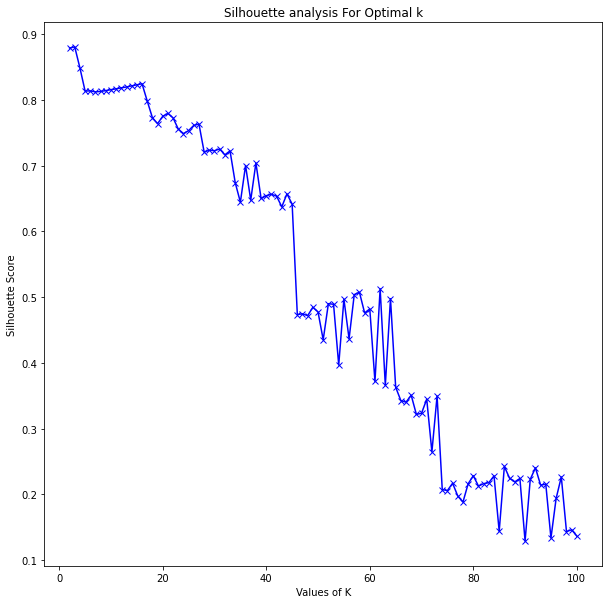

In [192]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
kmax = 100
for k in range(2, kmax+1):
    # initialise kmeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)   
plt.plot(list(range(2, kmax+1)),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

C:\Users\Greg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



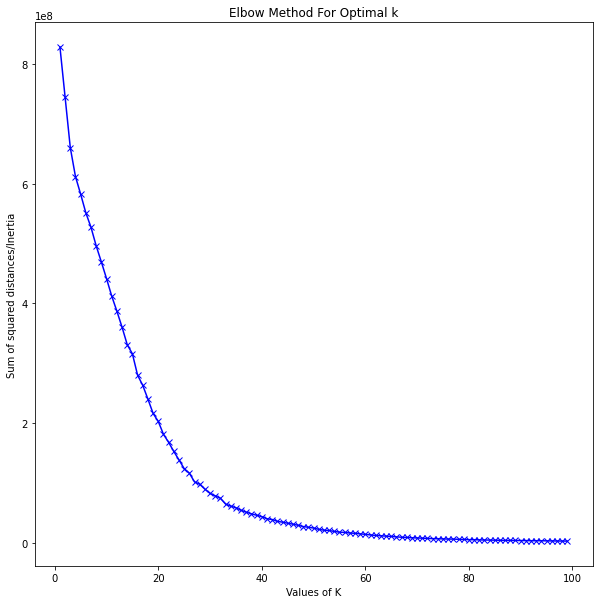

In [193]:
Sum_of_squared_distances = []
K = range(1,100)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [195]:
clustering = KMeans(n_clusters=33, random_state=rng)
clustering.fit(X)
labels = clustering.labels_
df['cluster_labels'] = labels

In [209]:
for i in range(1, 33, 1):
    display(df.loc[df['cluster_labels'] == i])

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
8  7DB6  Active  Agonist                NaN           NaN              NaN   

  1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
8           NaN              NaN                NaN           NaN  ...   

   7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
8            NaN             NaN            NaN              NaN   

  7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
8               NaN            NaN             NaN            NaN   

   7.68_intenergy2 cluster_labels  
8              NaN              1  

[1 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
242  4LDL  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
242           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
242            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
242               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
242              NaN              2  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
175  5O9H  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
175              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
175           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
175              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
175            NaN              NaN              3  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
131  6GPX  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
131              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
131           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
131              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
131            NaN              NaN              4  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
134  6E59  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
134              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
134           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
134              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
134            NaN              NaN              5  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
338  2YCX  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
338              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
338           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
338              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
338            NaN              NaN              6  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
46  7BR3  Inactive  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
46              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
46           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
46              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
46            NaN              NaN              7  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
130  6GPS  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
130              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
130           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
130              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
130            NaN              NaN              8  

[1 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
286  7VUG  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
286           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
286           None             0.0           None              0.0   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
286               0.0           None             0.0           None   

     7.68_intenergy2 cluster_labels  
286              0.0              9  

[1 rows x 1664 columns]

PDBID     State           Function  1.21_intenergysum 1.21_inttype1  \
281  7VOE  Inactive  Agonist (partial)                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
281              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
281           NaN  ...           None             0.0           None   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
281              0.0               0.0           None             0.0   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
281           None              0.0             10  

[1 rows x 1664 columns]

PDBID     State Function  1.21_intenergysum 1.21_inttype1  \
353  6YVR  Inactive  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
353              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
353           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
353              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
353            NaN              NaN             11  

[1 rows x 1664 columns]

PDBID     State Function  1.21_intenergysum 1.21_inttype1  \
300  6ZFZ  Inactive  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
300              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
300           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
300              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
300            NaN              NaN             12  

[1 rows x 1664 columns]

PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
66  6LI0  Intermediate  Agonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
66              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
66           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
66              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
66            NaN              NaN             13  

[1 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
309  7FIH  Active      PAM                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
309           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
309            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
309               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
309              NaN             14  

[1 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
136  6M9T  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
136           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
136            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
136               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
136              NaN             15  

[1 rows x 1664 columns]

PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
234  4PHU  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
234              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
234           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
234              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
234            NaN              NaN             16  

[1 rows x 1664 columns]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
231  4XNW  Intermediate  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
231              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
231           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
231              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
231            NaN              NaN             17  

[1 rows x 1664 columns]

PDBID   State    Function  1.21_intenergysum 1.21_inttype1  \
197  5UNG  Active  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
197              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
197           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
197              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
197            NaN              NaN             18  

[1 rows x 1664 columns]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0    7EW2        Active     Agonist                NaN           NaN   
1    7EW3        Active     Agonist                NaN           NaN   
2    7EW4        Active     Agonist                NaN           NaN   
3    7EW1        Active     Agonist                NaN           NaN   
4    7LD4        Active     Agonist                NaN           NaN   
..    ...           ...         ...                ...           ...   
359  5C1M        Active     Agonist                NaN           NaN   
360  4EJ4      Inactive  Antagonist                NaN           NaN   
361  4DKL      Inactive  Antagonist                NaN           NaN   
362  6Z10  Intermediate  Antagonist                0.0          None   
363  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
0                NaN           NaN              NaN                NaN   
1                NaN           NaN              NaN                NaN   
2                NaN           NaN              NaN                NaN   
3                NaN           NaN              NaN                NaN   
4                NaN           NaN              NaN                NaN   
..               ...           ...              ...                ...   
359              NaN           NaN              NaN                NaN   
360              NaN           NaN              NaN                NaN   
361              NaN           NaN              NaN                NaN   
362              0.0          None              0.0                0.0   
363              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0             NaN  ...            NaN             NaN            NaN   
1             NaN  ...            NaN             NaN            NaN   
2             NaN  ...            NaN             NaN            NaN   
3             NaN  ...            NaN             NaN            NaN   
4             NaN  ...            NaN             NaN            NaN   
..            ...  ...            ...             ...            ...   
359           NaN  ...            NaN             NaN            NaN   
360           NaN  ...            NaN             NaN            NaN   
361           NaN  ...            NaN             NaN            NaN   
362          None  ...            NaN             NaN            NaN   
363          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
0              NaN              NaN             19  
1              NaN              NaN             19  
2              NaN              NaN             19  
3              NaN              NaN             19  
4              NaN              NaN             19  
..             ...              ...            ...  
359            NaN              NaN             19  
360            NaN              NaN             19  
361            NaN             

PDBID         State           Function  1.21_intenergysum 1.21_inttype1  \
235  4PY0  Intermediate  Agonist (partial)                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
235              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
235           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
235              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
235            NaN              NaN             20  

[1 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
288  7VDL  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
288           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
288            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
288               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
288              NaN             21  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
137  5YHL  Inactive  Antagonist                NaN           NaN   
138  5YWY  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
137              NaN           NaN              NaN                NaN   
138              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
137           NaN  ...            NaN             NaN            NaN   
138           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
137              NaN               NaN            NaN             NaN   
138              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
137            NaN              NaN             22  
138            NaN              NaN             22  

[2 rows x 1664 columns]

PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
236  4PXZ  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
236              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
236           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
236              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
236            NaN              NaN             23  

[1 rows x 1664 columns]

PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
85  6OL9  Inactive  Inverse agonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
85              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
85           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
85              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
85            NaN              NaN             24  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
64   6LUQ  Inactive  Antagonist                NaN           NaN   
124  6A93  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
64               NaN           NaN              NaN                NaN   
124              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
64            NaN  ...            NaN             NaN            NaN   
124           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
64               NaN               NaN            NaN             NaN   
124              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
64             NaN              NaN             25  
124            NaN              NaN             25  

[2 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
287  7VDH  Active  Agonist                NaN           NaN              NaN   
296  7VV6  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
287           NaN              NaN                NaN           NaN  ...   
296           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
287            NaN             NaN            NaN              NaN   
296            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
287               NaN            NaN             NaN            NaN   
296               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
287              NaN             26  
296              NaN             26  

[2 rows x 1664 columns]

PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
192  5TZR  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
192              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
192           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
192              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
192            NaN              NaN             27  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
200  5UIG  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
200              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
200           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
200              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
200            NaN              NaN             28  

[1 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
315  7P00  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
315           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
315            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
315               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
315              NaN             29  

[1 rows x 1664 columns]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
106  6RZ4  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
106              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
106          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
106              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
106            NaN              NaN             30  

[1 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
230  4UG2  Active  Agonist                NaN           NaN              NaN   
283  7VUH  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
230           NaN              NaN                NaN           NaN  ...   
283           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
230            NaN             NaN            NaN              NaN   
283           None             0.0           None              0.0   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
230               NaN            NaN             NaN            NaN   
283               0.0           None             0.0           None   

     7.68_intenergy2 cluster_labels  
230              NaN             31  
283              0.0             31  

[2 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
292  7VV0  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
292           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
292            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
292               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
292              NaN             32  

[1 rows x 1664 columns]

In [47]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

# BICLUSTERING

In [213]:
import pickle

# read in filled ml_df for plotting
ml_df = pd.read_pickle('ml_df_filled.pkl')

# keep only intenergysum columns
for col in ml_df.columns:
    if 'intenergysum' not in col:
        ml_df.drop([col], axis = 1, inplace = True)
        
ml_df.fillna(999, inplace = True)
        
display(ml_df)

7EW2_intenergysum  7EW3_intenergysum  7EW4_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327              999.0              999.0                0.0   
328              999.0              999.0                0.0   
329              999.0              999.0                0.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     7EW1_intenergysum  7LD4_intenergysum  7LD3_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327              999.0                0.0                0.0   
328              999.0                0.0                0.0   
329              999.0              999.0              999.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     7RM5_intenergysum  7M8W_intenergysum  7DB6_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327                0.0              999.0              999.0   
328                0.0              999.0              999.0   
329              999.0              999.0              999.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     7EXD_intenergysum  ...  6ZA8_intenergysum  5T04_intenergysum  \
0                999.0  ...              999.0              999.0   
1                999.0  ...              999.0              999.0   
2                999.0  ...              999.0              999.0   
3                999.0  ...              999.0              999.0   
4                999.0  ...              999.0              999.0   
..                 ...  ...                ...                ...   
327              999.0  ...              999.0              999.0   
328              999.0  ...              999.0              999.0   
329              999.0  ...              999.0              999.0   
330              999.0  ...              999.0              999.0   
331              999.0  ...              999.0              999.0   

     4XEE_intenergysum  4XES_intenergysum  4GRV_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327              999.0              999.0              999.0   
328              999.0              999.0              999.0   
329              999.0              999.0              999.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     5C1M_intenergysum  4EJ4_intenergysum  4DKL_intenergysum  \
0                999.0              

In [214]:
ml_df.to_csv('ml_df_filled.csv')

In [215]:
X = pd.read_pickle('X_imputed_scaled_allresidues.pkl')
X.columns = ml_df_colnames[1:]
y = pd.read_pickle('y_residues.pkl')

In [216]:
display(X)

7EW2_intenergysum  7EW2_inttype1  7EW2_intenergy1  7EW2_inttype2  \
0             0.117047      -4.551741         0.151104      -3.763468   
1             0.117047      -4.551741         0.151104      -3.763468   
2             0.117047      -4.551741         0.151104      -3.763468   
3             0.117047      -4.551741         0.151104      -3.763468   
4             0.117047      -4.551741         0.151104      -3.763468   
..                 ...            ...              ...            ...   
327           0.117047      -4.551741         0.151104      -3.763468   
328           0.117047      -4.551741         0.151104      -3.763468   
329           0.117047      -4.551741         0.151104      -3.763468   
330           0.117047      -4.551741         0.151104      -3.763468   
331           0.117047      -4.551741         0.151104      -3.763468   

     7EW2_intenergy2  7EW3_intenergysum  7EW3_inttype1  7EW3_intenergy1  \
0           0.099458           0.089613       -2.89211          0.10593   
1           0.099458           0.089613       -2.89211          0.10593   
2           0.099458           0.089613       -2.89211          0.10593   
3           0.099458           0.089613       -2.89211          0.10593   
4           0.099458           0.089613       -2.89211          0.10593   
..               ...                ...            ...              ...   
327         0.099458           0.089613       -2.89211          0.10593   
328         0.099458           0.089613       -2.89211          0.10593   
329         0.099458           0.089613       -2.89211          0.10593   
330         0.099458           0.089613       -2.89211          0.10593   
331         0.099458           0.089613       -2.89211          0.10593   

     7EW3_inttype2  7EW3_intenergy2  ...  6Z10_intenergysum  6Z10_inttype1  \
0        -3.496811         0.085862  ...           0.350445      -6.650852   
1        -3.496811         0.085862  ...           0.350445      -6.650852   
2        -3.496811         0.085862  ...           0.350445      -6.650852   
3        -3.496811         0.085862  ...           0.350445      -6.650852   
4        -3.496811         0.085862  ...           0.350445      -6.650852   
..             ...              ...  ...                ...            ...   
327      -3.496811         0.085862  ...           0.138562      -3.520466   
328      -3.496811         0.085862  ...           0.138562      -3.520466   
329      -3.496811         0.085862  ...           0.138562      -3.520466   
330      -3.496811         0.085862  ...           0.138562      -3.520466   
331      -3.496811         0.085862  ...           0.138562      -3.520466   

     6Z10_intenergy1  6Z10_inttype2  6Z10_intenergy2  6RNK_intenergysum  \
0           0.518603      -6.966156         0.511964           0.233533   
1           0.518603      -6.966156         0.511964           0.233533   
2           0.518603      -6.966156         0.511964           0.233533   
3           0.518603      -6.966156         0.511964           0.233533   
4           0.518603      -6.966156         0.511964           0.233533   
..               ...            ...              ...                ...   
327         0.146999      -4.725967         0.094515           0.140443   
328         0.146999      -4.725967         0.094515           0.140443   
329         0.146999      -4.725967         0.094515           0.140443   
330         0.146999      -4.725967         0.094515           0.140443   
331         0.146999      -4.725967         0.094515           0.140443   

     6RNK_inttype1  6RNK_intenergy1  6RNK_inttype2  6RNK_intenergy2  
0        -6.262522         0.291928      -7.925527         3.555116  
1        -6.262522         0.291928      -7.925527         3.555116  
2        -6.262522         0.291928      -7.925527         3.555116  
3        -6.262522         0.291928      -7.925527         3.555116  
4        -6.262522         0.291928    

In [217]:
for col in X.columns:
    if 'intenergysum' not in col:
        X.drop([col], axis = 1, inplace = True)

In [218]:
display(X)

7EW2_intenergysum  7EW3_intenergysum  7EW4_intenergysum  \
0             0.117047           0.089613           0.183344   
1             0.117047           0.089613           0.183344   
2             0.117047           0.089613           0.183344   
3             0.117047           0.089613           0.183344   
4             0.117047           0.089613           0.183344   
..                 ...                ...                ...   
327           0.117047           0.089613           4.376378   
328           0.117047           0.089613           4.376378   
329           0.117047           0.089613           4.376378   
330           0.117047           0.089613           0.183344   
331           0.117047           0.089613           0.183344   

     7EW1_intenergysum  7LD4_intenergysum  7LD3_intenergysum  \
0             0.136516           0.104462           0.111035   
1             0.136516           0.104462           0.111035   
2             0.136516           0.104462           0.111035   
3             0.136516           0.104462           0.111035   
4             0.136516           0.104462           0.111035   
..                 ...                ...                ...   
327           0.136516           0.410008           0.406673   
328           0.136516           0.410008           0.406673   
329           0.136516           0.104462           0.111035   
330           0.136516           0.104462           0.111035   
331           0.136516           0.104462           0.111035   

     7RM5_intenergysum  7M8W_intenergysum  7DB6_intenergysum  \
0             0.104368           0.142683           0.110122   
1             0.104368           0.142683           0.110122   
2             0.104368           0.142683           0.110122   
3             0.104368           0.142683           0.110122   
4             0.104368           0.142683           0.110122   
..                 ...                ...                ...   
327           0.428393           0.142683           0.110122   
328           0.428393           0.142683           0.110122   
329           0.104368           0.142683           0.110122   
330           0.104368           0.142683           0.110122   
331           0.104368           0.142683           0.110122   

     7EXD_intenergysum  ...  6ZA8_intenergysum  5T04_intenergysum  \
0             0.088134  ...           0.154823                0.0   
1             0.088134  ...           0.154823                0.0   
2             0.088134  ...           0.154823                0.0   
3             0.088134  ...           0.154823                0.0   
4             0.088134  ...           0.154823                0.0   
..                 ...  ...                ...                ...   
327           0.088134  ...           0.154823                0.0   
328           0.088134  ...           0.154823                0.0   
329           0.088134  ...           0.154823                0.0   
330           0.088134  ...           0.154823                0.0   
331           0.088134  ...           0.154823                0.0   

     4XEE_intenergysum  4XES_intenergysum  4GRV_intenergysum  \
0                  0.0           0.080092           0.080802   
1                  0.0           0.080092           0.080802   
2                  0.0           0.080092           0.080802   
3                  0.0           0.080092           0.080802   
4                  0.0           0.080092           0.080802   
..                 ...                ...                ...   
327                0.0           0.080092           0.080802   
328                0.0           0.080092           0.080802   
329                0.0           0.080092           0.080802   
330                0.0           0.080092           0.080802   
331                0.0           0.080092           0.080802   

     5C1M_intenergysum  4EJ4_intenergysum  4DKL_intenergysum  \
0             0.103387           0.1

In [219]:
from sklearn.cluster import SpectralBiclustering

In [259]:
n_clusters = 10
bi_model = SpectralBiclustering(n_clusters= n_clusters, method="log", random_state=0)
bi_model.fit(X)

SpectralBiclustering(method='log', n_clusters=10, random_state=0)

In [260]:
# labels for residues
bi_model.row_labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 4, 9, 9, 9, 9,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 5, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 7, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 5,
       5, 5, 0, 0, 0, 3, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 5, 5,
       5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7,
       0, 0, 6, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 0, 0, 0, 0, 0,

In [261]:
# value counts for row labels (residues)
np.unique(bi_model.row_labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([182,   1,   1,   2,  89,  23,   2,  11,  13,   8], dtype=int64))

In [262]:
# determine where to place row lines
uniqs = np.unique(bi_model.row_labels_, return_counts=True)
line_count = 0
row_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    row_line_markers.append(line_count)
    print(line_count)
    
print(row_line_markers)

182
183
184
186
275
298
300
311
324
332
[182, 183, 184, 186, 275, 298, 300, 311, 324, 332]


In [263]:
# labels for structures
bi_model.column_labels_

array([8, 8, 9, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1,
       8, 9, 9, 9, 9, 8, 8, 0, 8, 0, 8, 8, 8, 8, 9, 8, 9, 9, 8, 0, 8, 8,
       8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8,
       8, 8, 8, 7, 0, 6, 8, 8, 9, 9, 9, 6, 5, 8, 8, 9, 9, 8, 0, 8, 8, 8,
       8, 8, 9, 8, 8, 8, 8, 8, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 8,
       8, 8, 9, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       8, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8,
       9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8,

In [264]:
# value counts for column labels (structures)
np.unique(bi_model.column_labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([  8,   1,   1,   1,   1,   1,   2,   1, 308,  40], dtype=int64))

In [265]:
# determine where to place column lines
uniqs = np.unique(bi_model.column_labels_, return_counts=True)
line_count = 0
col_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    col_line_markers.append(line_count)
    print(line_count)
    
print(col_line_markers)

8
9
10
11
12
13
15
16
324
364
[8, 9, 10, 11, 12, 13, 15, 16, 324, 364]


In [266]:
PDBids = []
for PDBid in list(X.columns):
    # print(PDBid[0:4])
    PDBids.append(PDBid[0:4])

In [267]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


matplotlib.rcParams['figure.figsize'] = [25, 25] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)
fig = plt.figure(figsize=(25, 25), dpi = 600)

# convert some variables to numpy arrays for sorting
ml_df_np = ml_df.to_numpy()
X_np = X.to_numpy()
PDBids_np = np.array(PDBids)
resnums_np = np.array(resnums)

# Original Dataset Plot
#plt.gcf().set_size_inches(75, 75)
#plt.gcf().set_dpi(300)
norm= plt.Normalize(-40,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])
plt.matshow(ml_df, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), resnums, fontsize = 2.5)
plt.xticks(np.arange(len(ml_df.columns)), PDBids, fontsize = 2.5, rotation = 90)

# # Gridlines
# plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
# plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
# plt.grid(which='minor', color = 'white', linewidth = 0.1)

# for i in range(len(resnums)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)
    
# for i in range(len(PDBids)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)

plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("Original dataset")
plt.savefig('plots/allresidues_biclustering_10clusters_original.png')

plt.show()

# Biclustering Arranged Plot

fit_data = ml_df_np[np.argsort(bi_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bi_model.column_labels_)]

plt.matshow(fit_data, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), list(resnums_np[np.argsort(bi_model.row_labels_)]), fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), list(PDBids_np[np.argsort(bi_model.column_labels_)]), fontsize = 2.5, rotation = 90)

# column lines
for i in col_line_markers:
     plt.axvline(x = i + 0.5, color='black', linestyle='dashed', linewidth = 0.25)
        
# row lines
for i in row_line_markers:
     plt.axhline(y = i + 0.5, color='black', linestyle='dashed', linewidth = 0.25)


plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("After biclustering; rearranged to show biclusters")
plt.savefig('plots/allresidues_biclustering_10clusters_rearranged.png')

plt.show()

<Figure size 15000x15000 with 0 Axes>

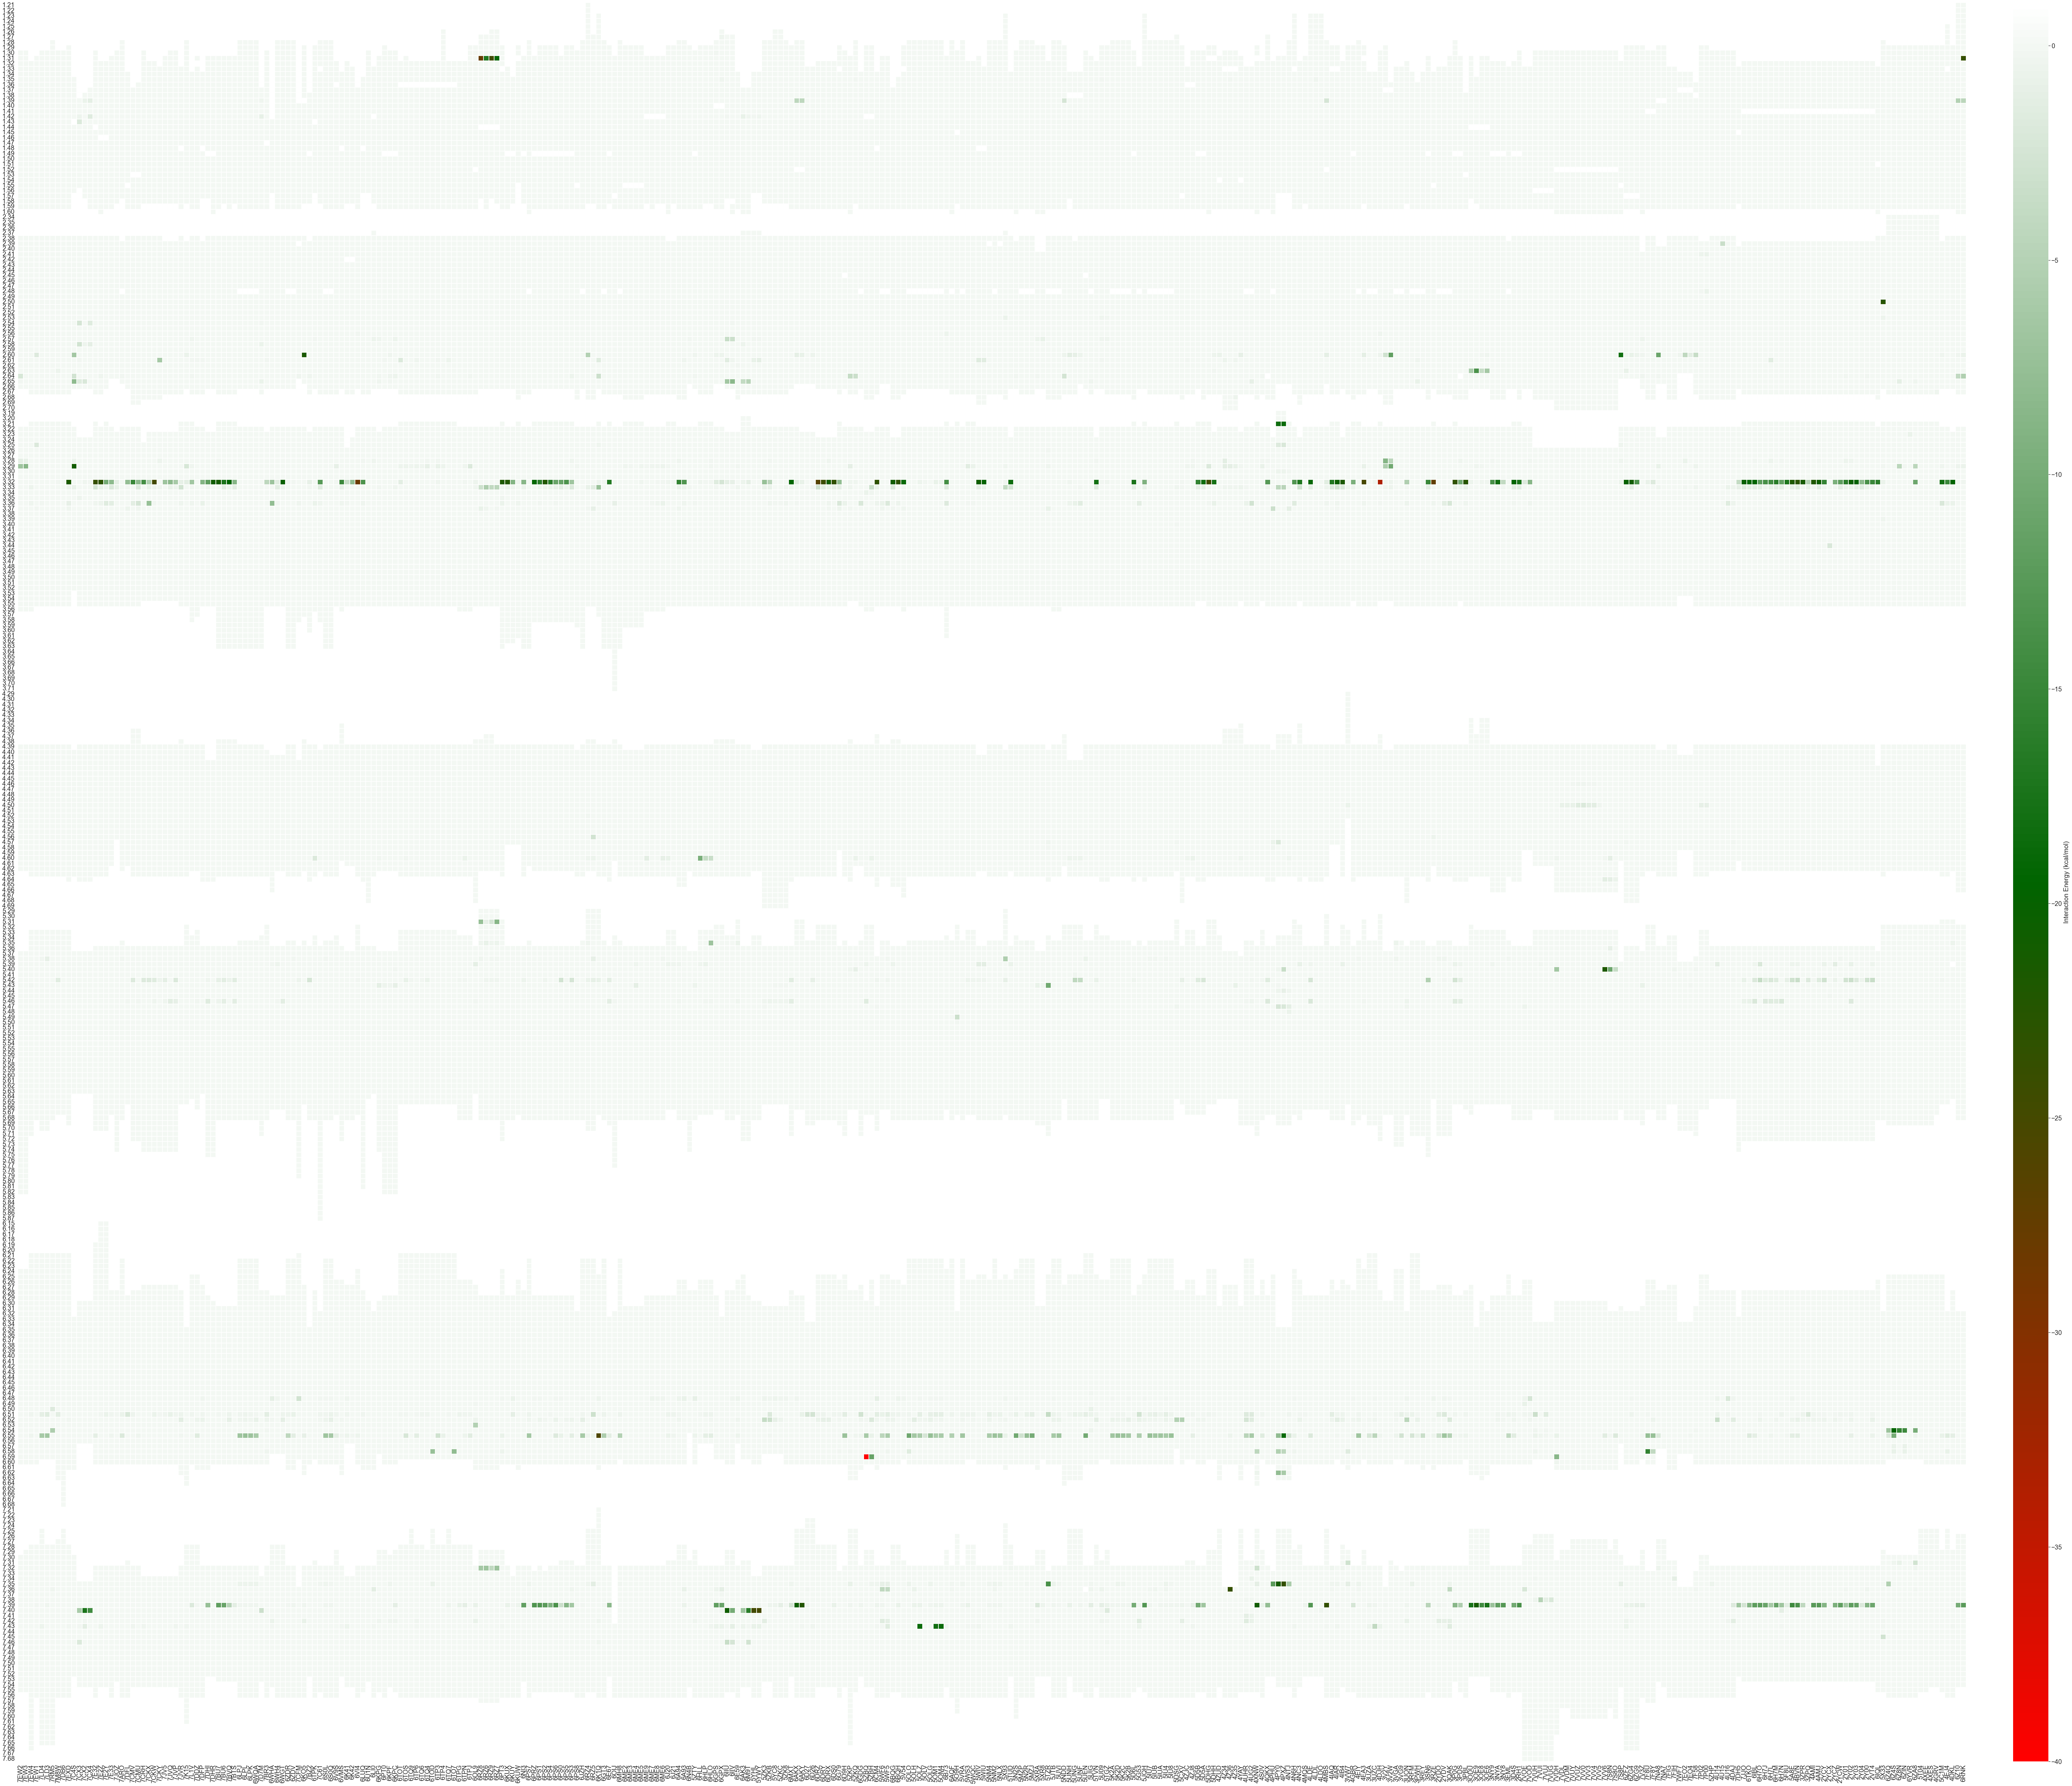

In [137]:
import seaborn as sns
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = [60, 50] #width, height (both in inches)
# matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

# get bigger plot
plt.subplots(figsize=(130,100))
norm= plt.Normalize(-40,1)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","darkgreen","white"])

ax = sns.heatmap(ml_df,
                 cmap = cmap,
                 norm = norm,
                 xticklabels = PDBids,
                 yticklabels = resnums,
                 #linecolor='gray',
                 cbar_kws={'label': 'Interaction Energy (kcal/mol)', "aspect": 50, "pad":0.02},
                 linewidths = 0.05)

sns.set(font_scale = 1.8)
#plt.title('Heatmap of Interaction Energies for each Structure at each Residue Position', fontsize = 20) # title with fontsize 20
#plt.xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
#plt.ylabel('Structure PBDid', fontsize = 20)
plt.ylim([0,len(resnums)])
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.gca().invert_yaxis()
plt.show()